### Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [13]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

### Merge datasets on CustomerID

In [14]:
data = pd.merge(transactions, customers, on="CustomerID", how="inner")

### Feature engineering: Create features based on transactions

In [15]:
customer_data = data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_transactions=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean")
).reset_index()

### Standardizing the features for clustering

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spent', 'total_transactions', 'avg_transaction_value']])

### Apply KMeans clustering (choosing 5 clusters as an example)

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

### Calculate Davies-Bouldin Index

In [18]:
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')

Davies-Bouldin Index: 0.8525


### Calculating Silhouette Score

In [19]:
sil_score = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.3535


## Visualizing clusters using (2D plot)

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

### Visulaizing Clusters

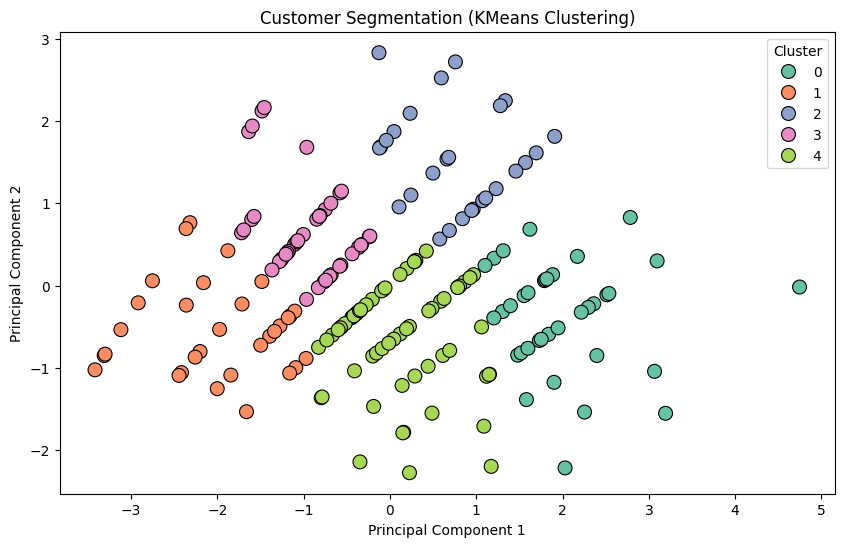

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set2', s=100, edgecolor='k')
plt.title('Customer Segmentation (KMeans Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()